In [110]:
import os
import glob
import pydicom
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import cv2

import matplotlib
import matplotlib.pyplot as plt
import numpy as np

from skimage import data
from skimage.filters import threshold_multiotsu

In [2]:
files = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_unempty slices/*Carotid_Baseline/*.dcm')

In [17]:
#seq_names = []

#for filename in files: 
#    basename = os.path.basename(filename)
#    seq_names.append(basename.split('_')[0])

#print (np.unique(seq_names))

#print (len(np.unique(seq_names)))

In [18]:
#for filename in files: 
    
#    dirname = os.path.dirname(filename)
#    basename = os.path.basename(filename)
#    basename_components = basename.split('_')
#    seq_name = basename_components[0]
    
#    if seq_name in ['QIR TR800', 'QIR TR800 PRECONTRAST', 'T1W 2D DIR', 'WIP QIR TR800 PRECONTRAST CLEAR']:
#        seq_name_standard = 'T1w'
#    elif seq_name in ['T2W MS TSE', 'WIP T2W MS TSE']:
#        seq_name_standard = 'T2w'
#    elif seq_name in ['3D TOF', '3DTOF', 'WIP 3DTOF']:
#        seq_name_standard = 'TOF'
#    elif seq_name in ['T1-TFE', 'T1-TFE seattle', 'T1-TFE transversaal', 'WIP T1-TFE CLEAR']:
#        seq_name_standard = 'TFE'
#    elif seq_name in ['QIR TR800 + contrast', 'QIR TR800 POSTCONTRAST', 'QIR TR800 contrast', 'QIR TR800 gd',
#                    'T1W 2D DIR + contrast', 'T1W 2D DIR Gd', 'T1W 2D DIR gd', 'WIP QIR TR800 POSTCONTRAST CLEAR']:
#        seq_name_standard = 'T1w-contrast'
#    else:
#        print (filename)
#        pass
        
#    basename_standard = seq_name_standard + '_' + '_'.join(tuple(basename_components[1:-1])) + '.dcm'
#    filename_standard = os.path.join(dirname, basename_standard)
#    os.rename(filename, filename_standard)

In [33]:
#seq_check = []

#for item in os.listdir(r"Z:\Lisa\PARISK\PARISK-XNAT\plaque_converted"):
#    subfolder = os.path.join(r"Z:\Lisa\PARISK\PARISK-XNAT\plaque_converted", item)
#    seqs = []
#    for filename in os.listdir(subfolder):
#        basename = os.path.basename(filename)
#        seq_name = basename.split('_')[0]
#        seqs.append(seq_name)
#    rec = {'sub': item, 'seqs': np.unique(seqs)}
#    seq_check.append(rec)
    
#seq_check = pd.DataFrame(seq_check)

In [35]:
#seq_check.to_csv('parisk_seq_check.csv')

In [3]:
con_list = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_unempty slices/*Carotid_Baseline/MASSExport/*.dcm')

In [4]:
con_components = []

for con_name in con_list:
    con_dcm = pydicom.read_file(con_name, force = True)
    con_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    con = con_dcm.pixel_array
    rec = {'con': con_name, 'com_any': False, 'com_3': False, 'com_4': False, 'com_5': False, 'com_6': False}
    if np.sum(con>2)>0:
        rec['com_any'] = True
        if np.sum(con==3)>0:
            rec['com_3'] = True
        if np.sum(con==4)>0:
            rec['com_4'] = True
        if np.sum(con==5)>0:
            rec['com_5'] = True
        if np.sum(con==6)>0:
            rec['com_6'] = True
    con_components.append(rec)
    
con_components = pd.DataFrame(con_components)

In [5]:
con_components

,con,com_any,com_3,com_4,com_5,com_6
0,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,False,False,False,False,False
1,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,False,False,False,False,False
2,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,False,False,False,False,False
3,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,False,False,False,False,False
4,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,True,True,False,False,False
...,...,...,...,...,...,...
2590,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,True,True,False,False,True
2591,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,True,True,False,False,False
2592,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,True,True,False,False,False
2593,Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_un...,False,False,False,False,False


In [6]:
len(con_components.loc[con_components.com_any == True])

1312

In [7]:
len(con_components.loc[con_components.com_3 == True])

588

In [8]:
len(con_components.loc[con_components.com_4 == True])

1085

In [9]:
len(con_components.loc[con_components.com_5 == True])

1

In [10]:
len(con_components.loc[con_components.com_6 == True])

318

172 patients (18 not full)  
2595 slices  
1312 contain components  
588 contain lipid (3)  
1085 contain calcification (4)  
318 contain haemorrhage

In [11]:
con_list_com = list(con_components.loc[con_components.com_any == True].con)

In [12]:
# if at least 1 seq is absent

subs_notfull_check = []

for con_name in con_list:
    sub = con_name.split(os.path.sep)[1].split('_')[0]
    sl = con_name[-17:-11]
    t1w_list = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted/' + sub + '*Carotid_Baseline/T1w_*' + sl +'.dcm')
    t1wc_list = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted/' + sub + '*Carotid_Baseline/T1w-contrast_*' + sl +'.dcm')
    t2w_list = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted/' + sub + '*Carotid_Baseline/T2w_*' + sl +'.dcm')
    tof_list = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted/' + sub + '*Carotid_Baseline/TOF_*' + sl +'.dcm')
    tfe_list = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted/' + sub + '*Carotid_Baseline/TFE_*' + sl +'.dcm')
    if len(t1w_list)==0:
        subs_notfull_check.append(sub)
    if len(t1wc_list)==0:
        subs_notfull_check.append(sub)
    if len(t2w_list)==0:
        subs_notfull_check.append(sub)
    if len(tof_list)==0:
        subs_notfull_check.append(sub)
    if len(tfe_list)==0:
        subs_notfull_check.append(sub)
        

In [13]:
sub_notfull = np.unique(subs_notfull_check)
sub_notfull

array(['AMC004', 'AMC015', 'AMC016', 'AMC017', 'MUMC004', 'MUMC012',
       'MUMC028', 'MUMC042', 'MUMC043', 'MUMC087', 'MUMC102', 'UMCU003',
       'UMCU004', 'UMCU005', 'UMCU006', 'UMCU007', 'UMCU013', 'UMCU014',
       'UMCU029'], dtype='<U7')

In [14]:
con_list_com_full = []

for con_name in con_list_com:
    sub = con_name.split(os.path.sep)[1].split('_')[0]
    if sub in sub_notfull:
        pass
    else:
        con_list_com_full.append(con_name)
        
len(con_list_com_full)

1192

In [15]:
for con_name in con_list:
    con_dcm = pydicom.read_file(con_name, force = True)
    con_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    con = con_dcm.pixel_array
    if con.shape!=(528, 528):
        print (con_name)

In [16]:
for file_name in files:
    file_dcm = pydicom.read_file(file_name, force = True)
    file_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    file_img = file_dcm.pixel_array
    if file_img.shape!=(528, 528):
        print (file_name)

MUMC23, MUMC31, UMCU30

In [17]:
def get_image(dcm_name):
    dcm = pydicom.read_file(dcm_name, force = True)
    dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    img = dcm.pixel_array
    return img

In [18]:
def create_shaped(img_input):
    dim = img_input.shape
    img_padded = np.zeros([528, 528], dtype=np.int16)
    #img_padded[:dim[0], :dim[1]] = img_input
    img_padded = img_input[:528, :528]
    return img_padded

In [19]:
def write_image(dcm_name, img):
    dcm = pydicom.read_file(dcm_name, force = True)
    dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    
    dcm.PixelData = img.tobytes()
    
    dcm.Rows = 528
    dcm.Columns = 528
    dcm[(0x0028,0x0006)]._value = 0
    dcm.save_as(dcm_name)
    return None

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


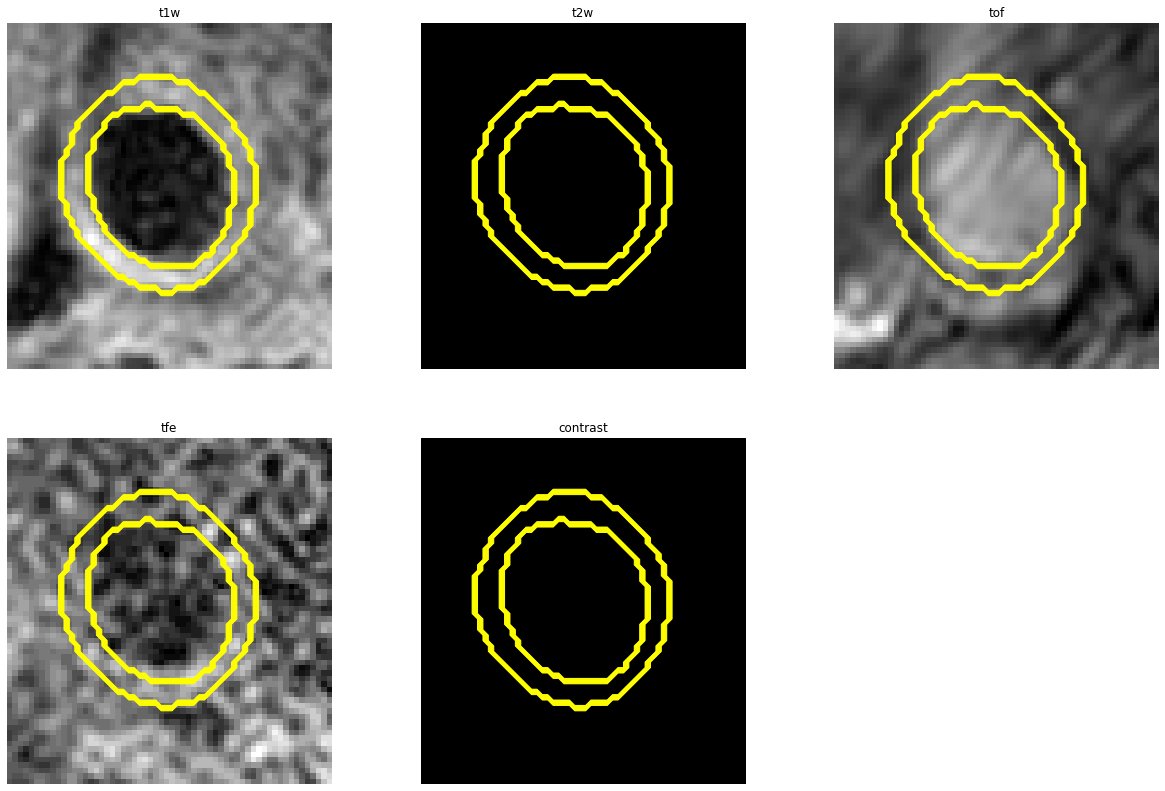

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


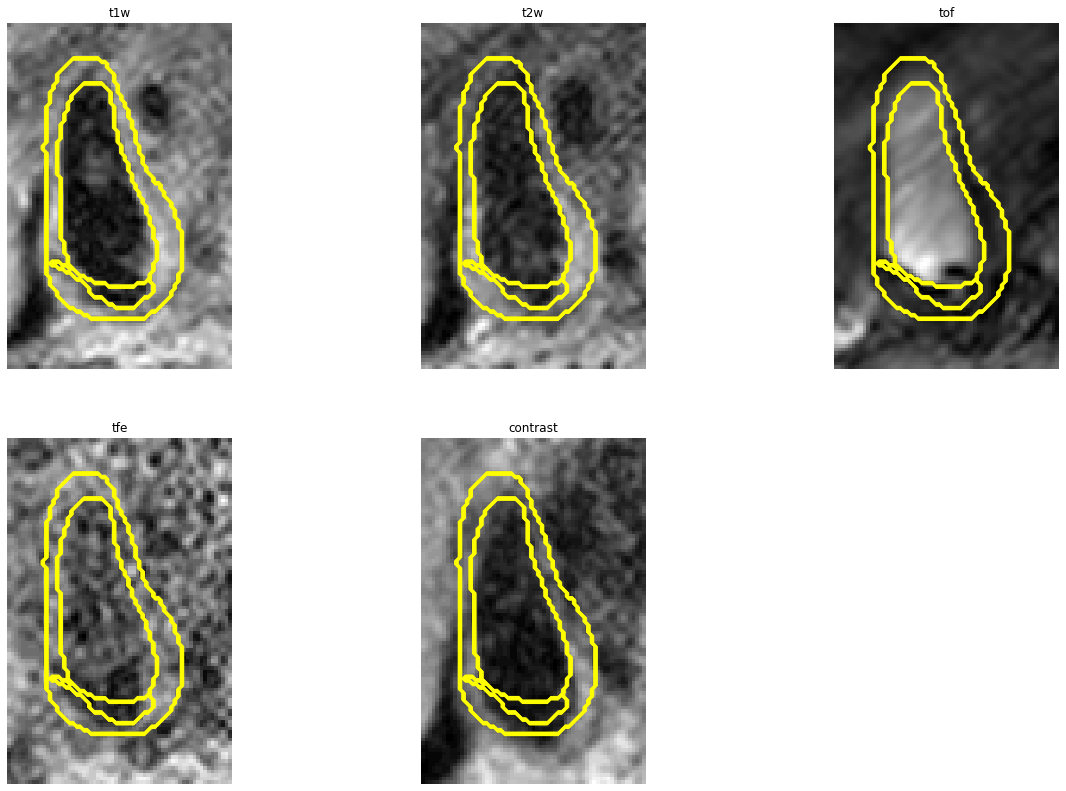

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


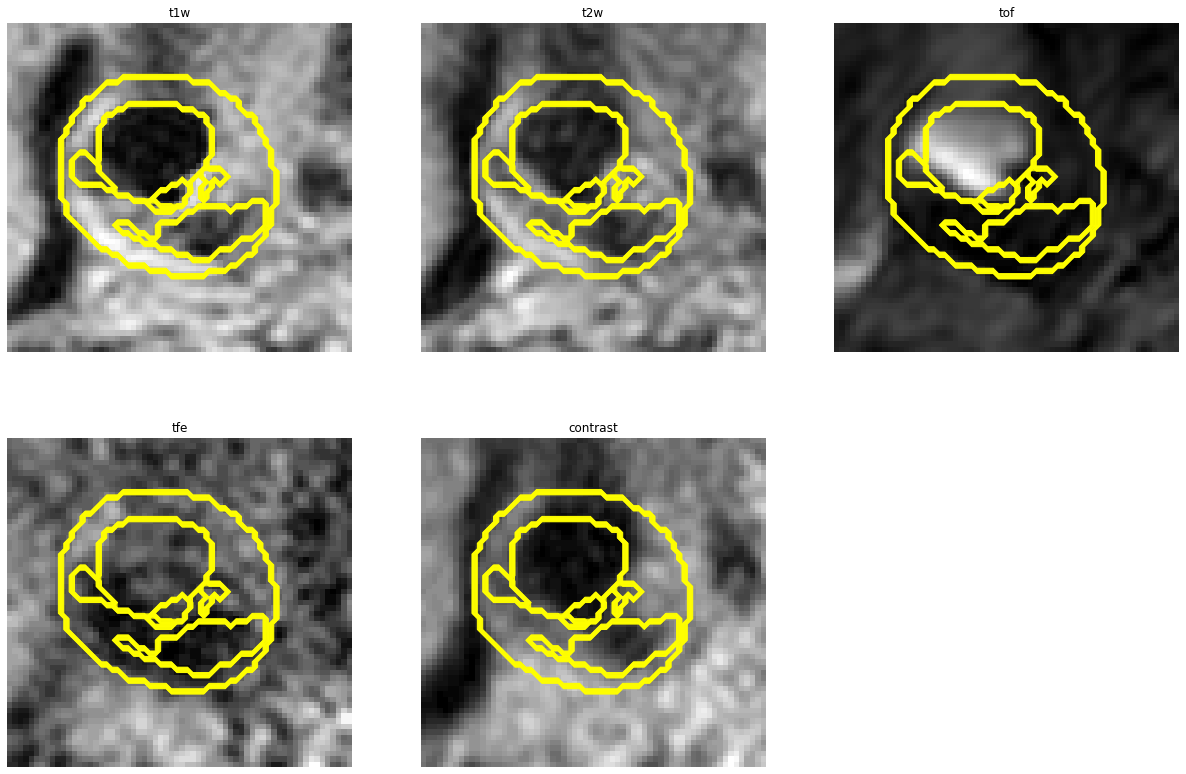

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


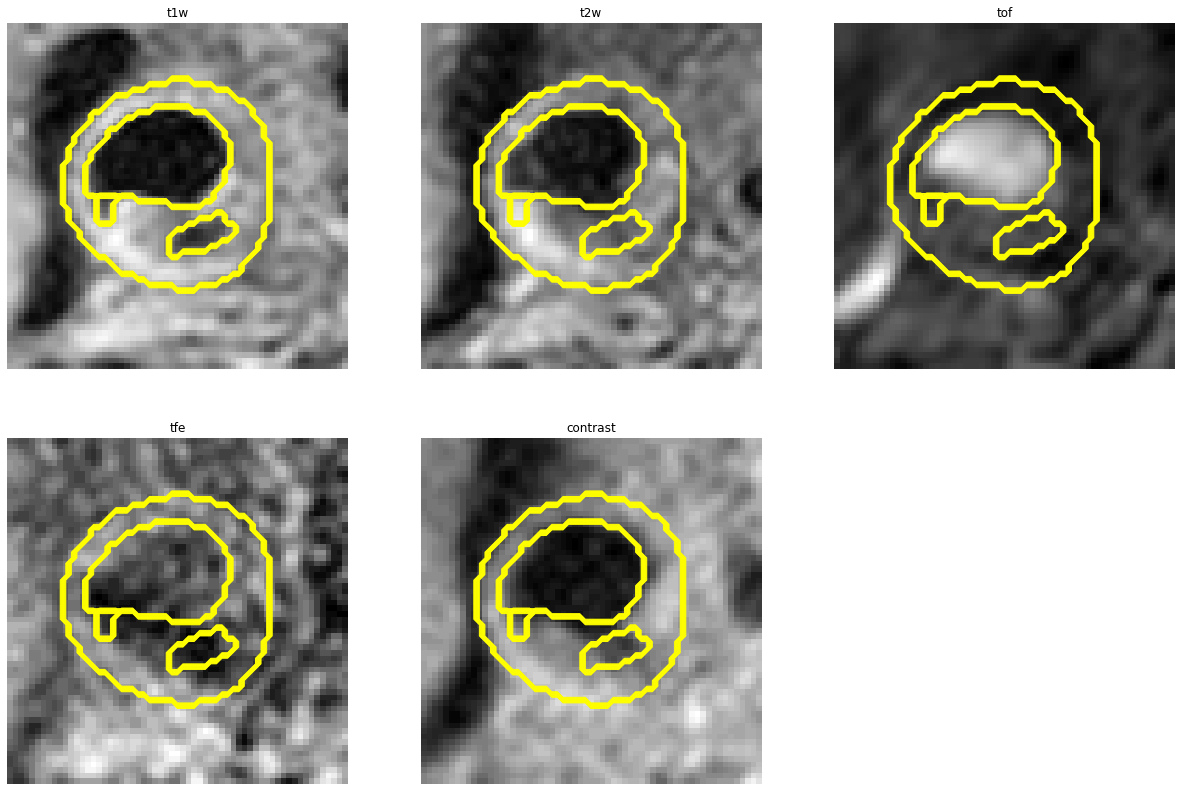

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


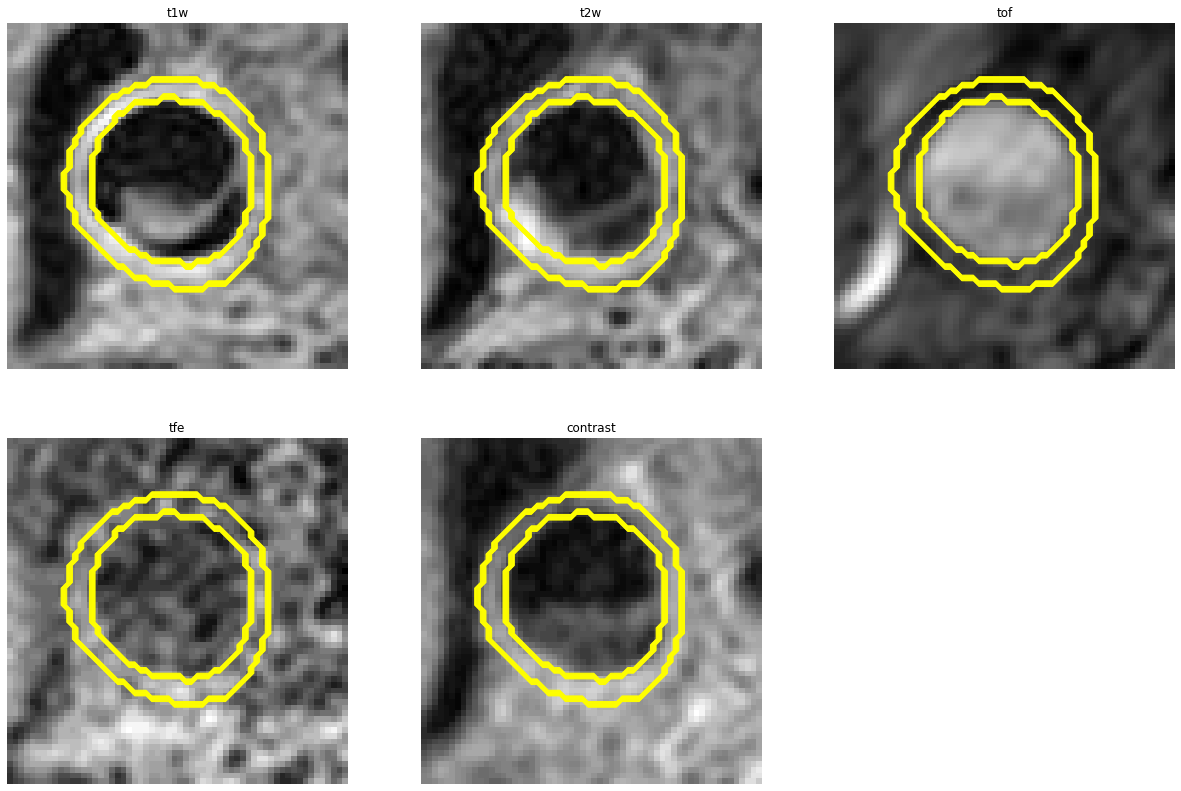

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


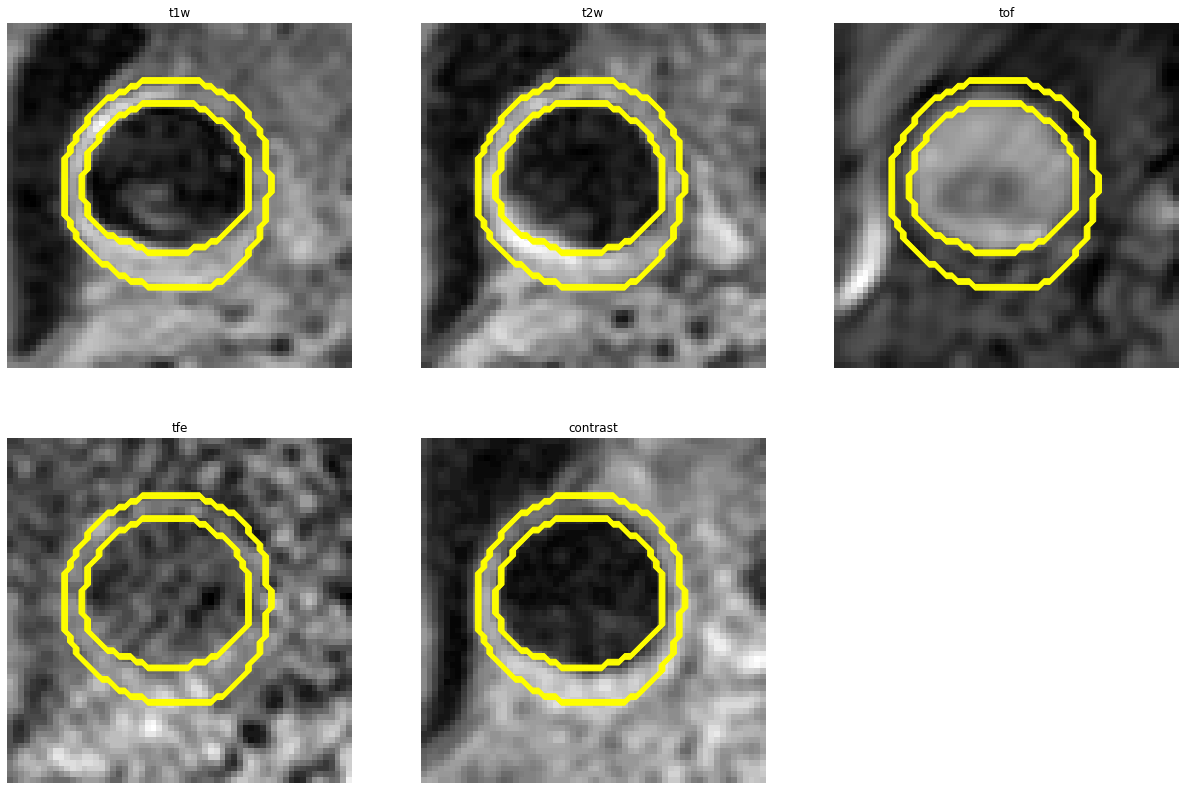

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


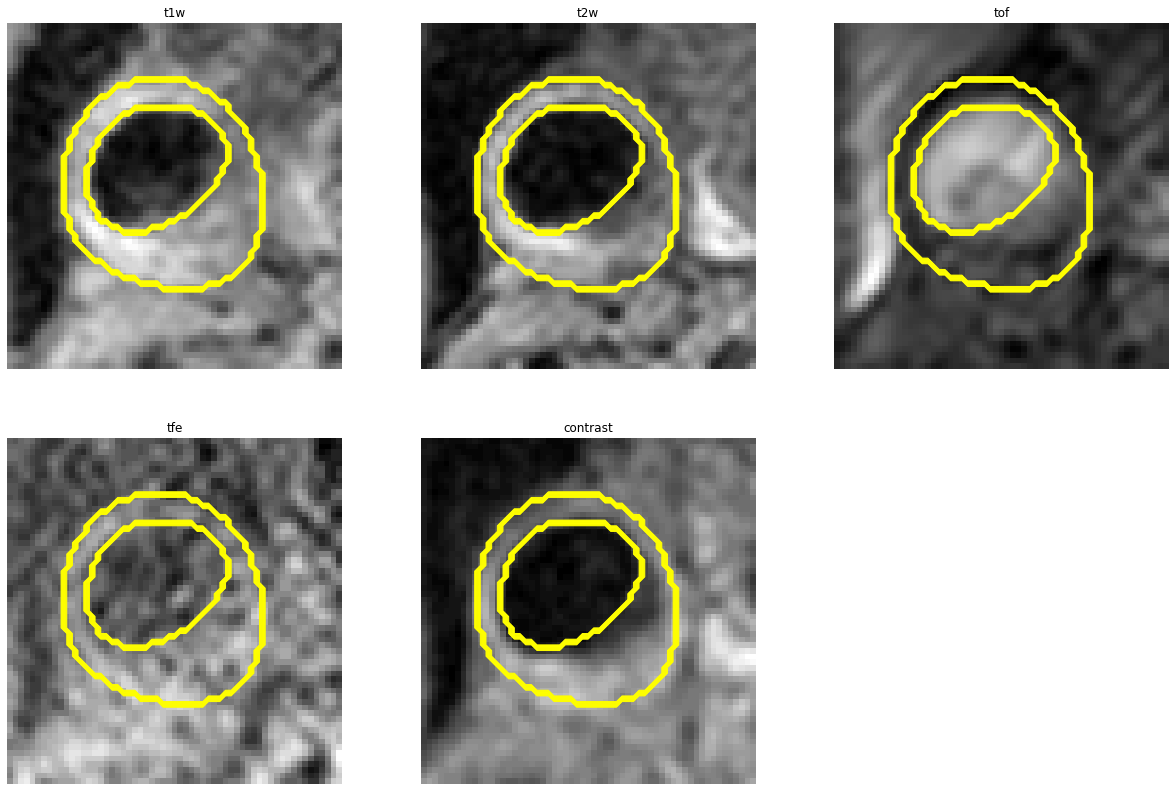

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


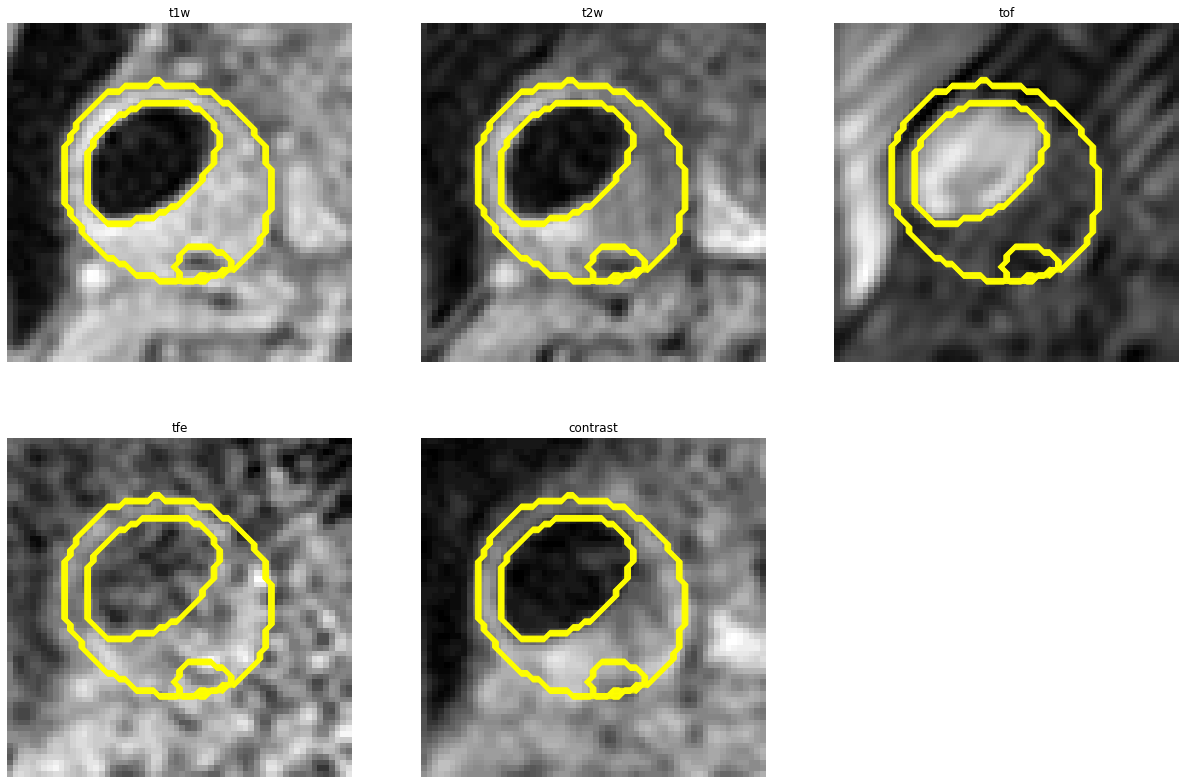

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


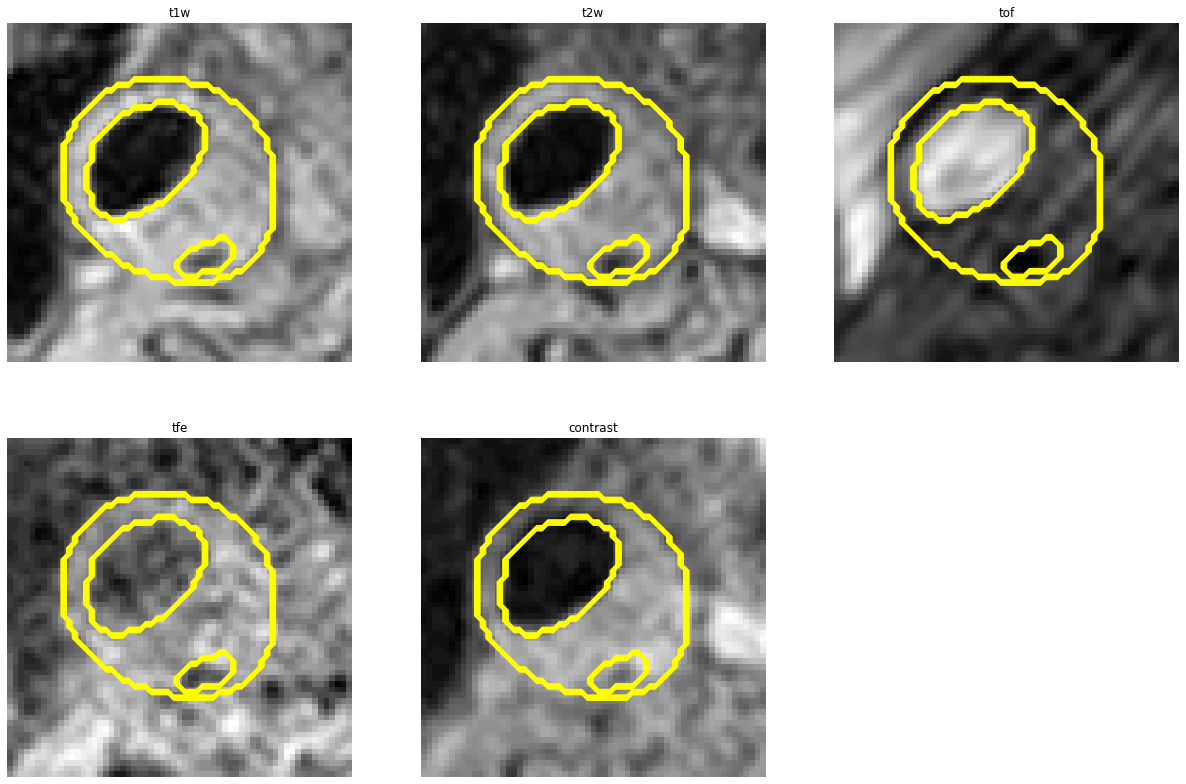

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


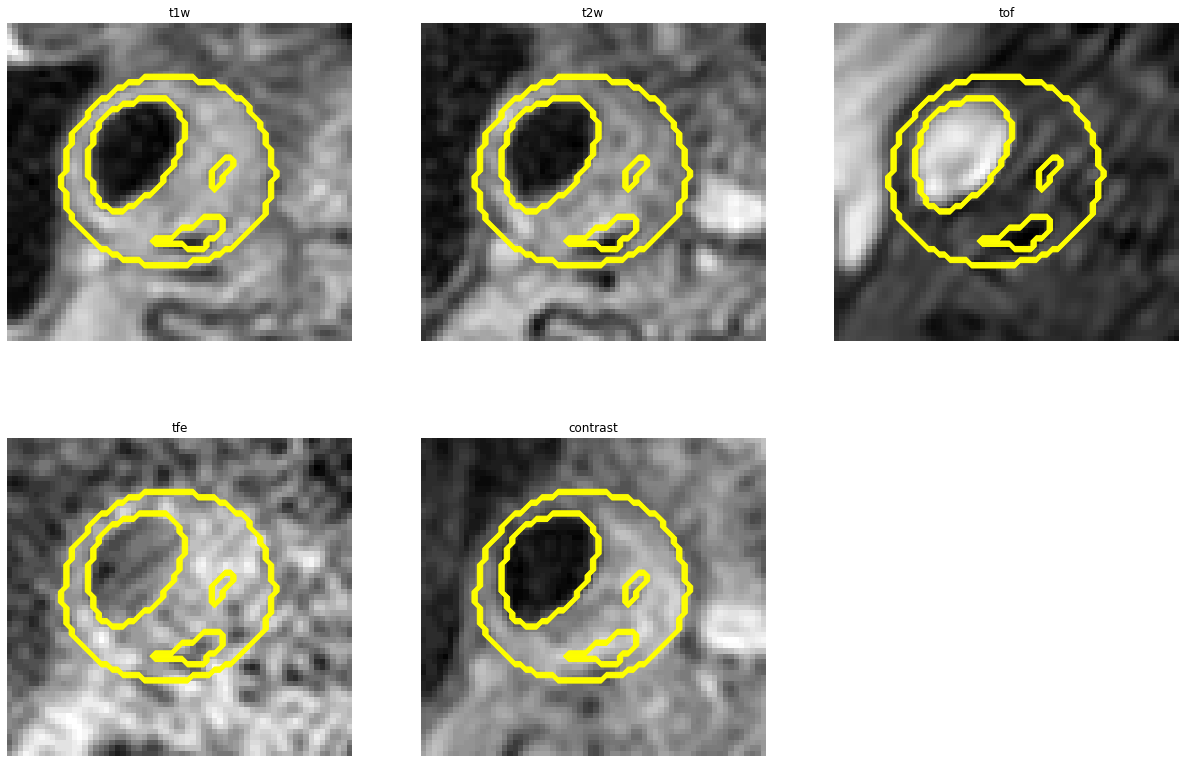

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


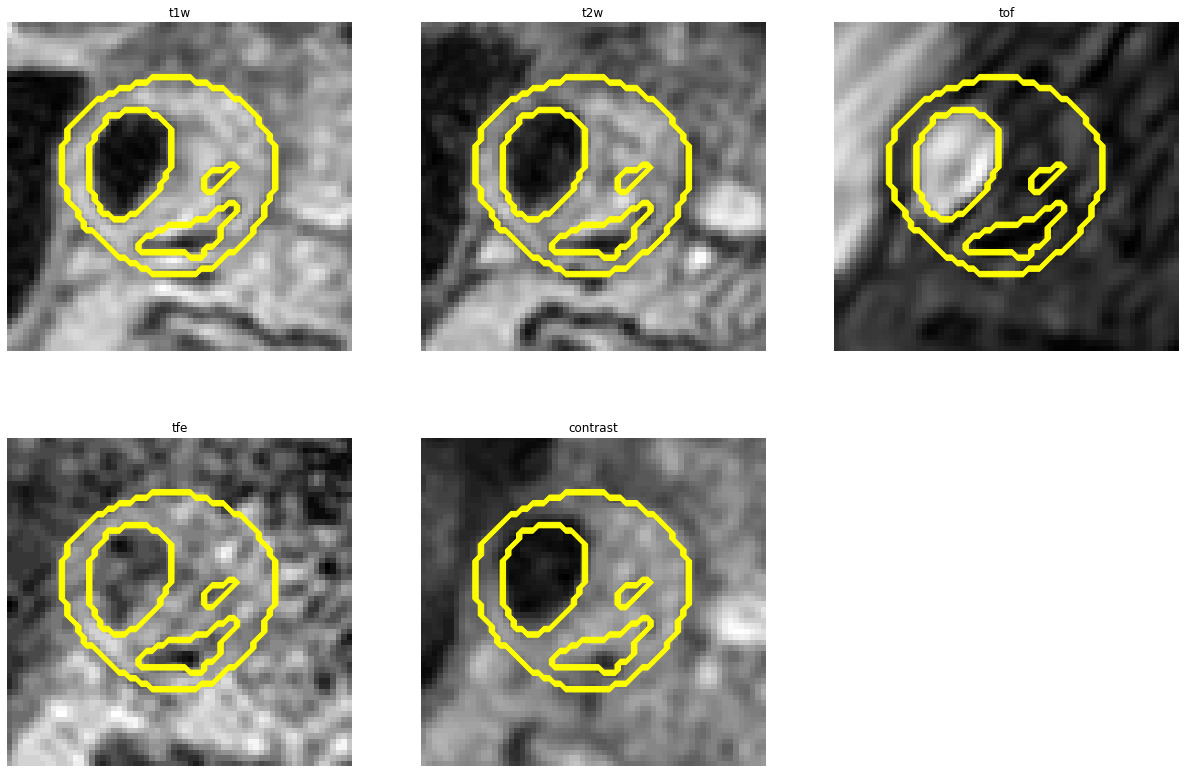

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


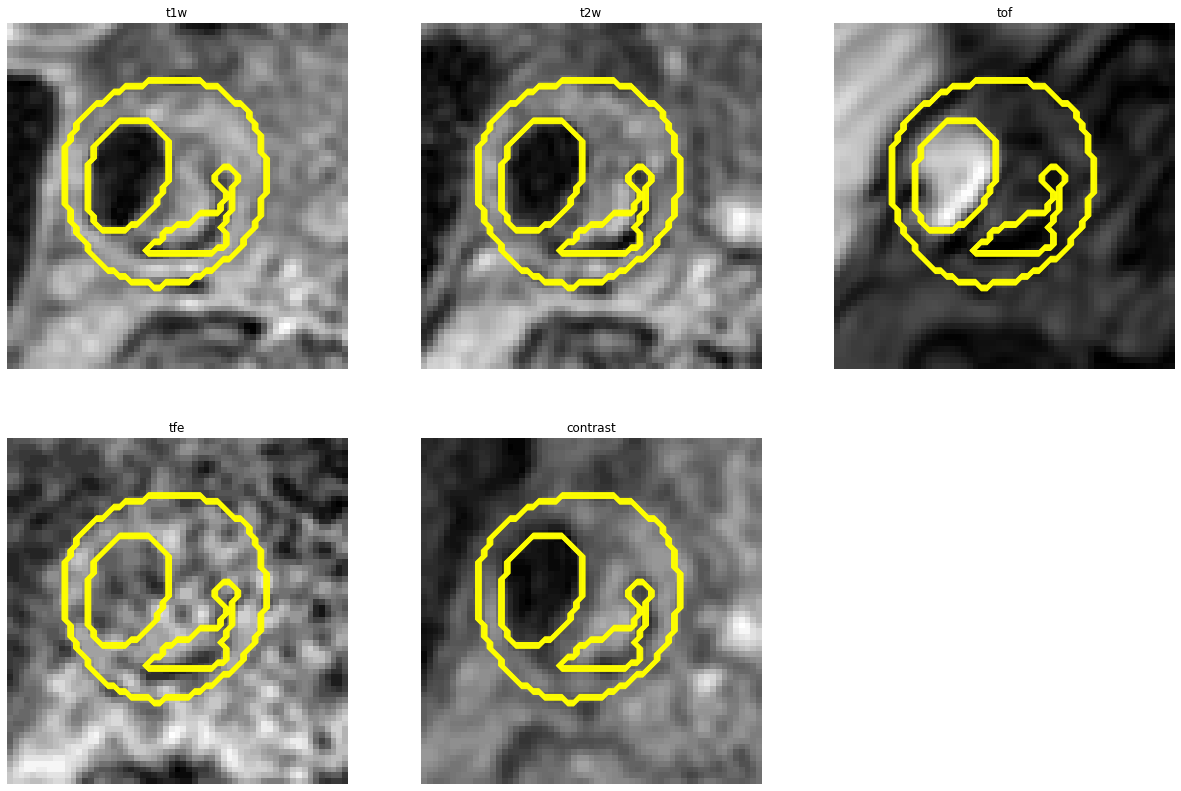

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


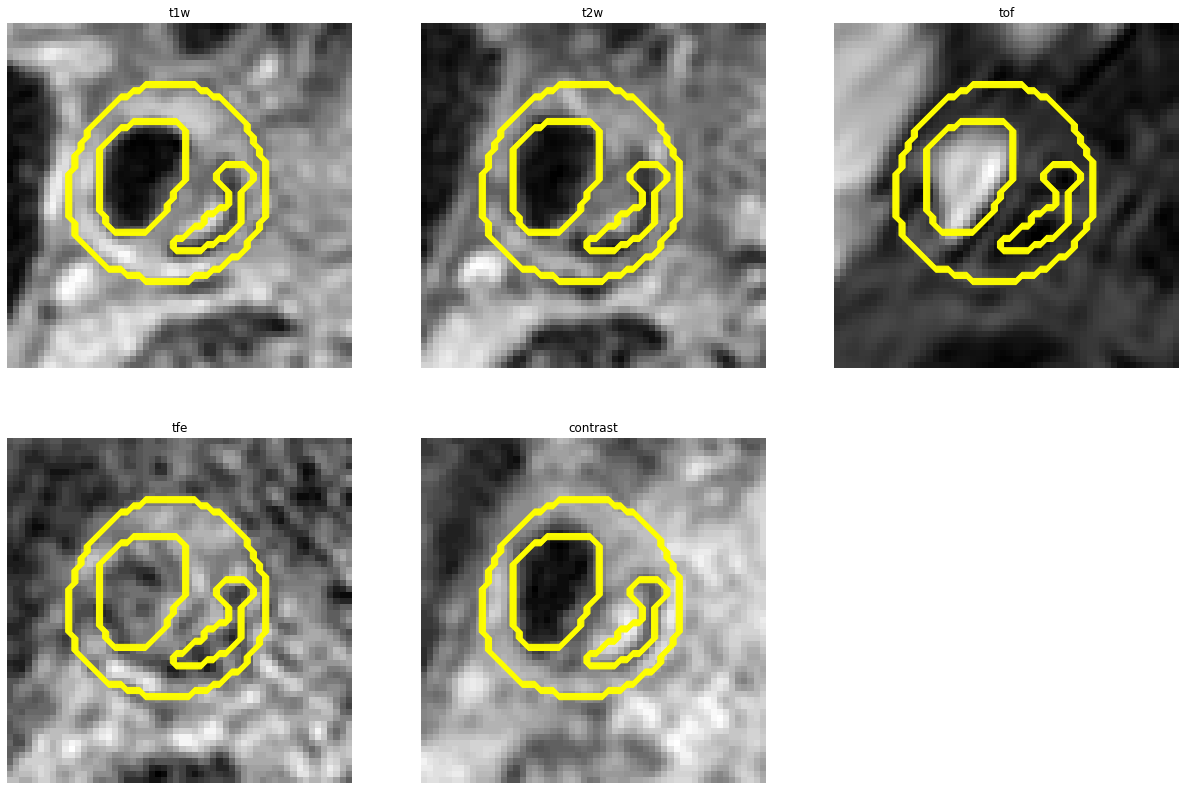

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


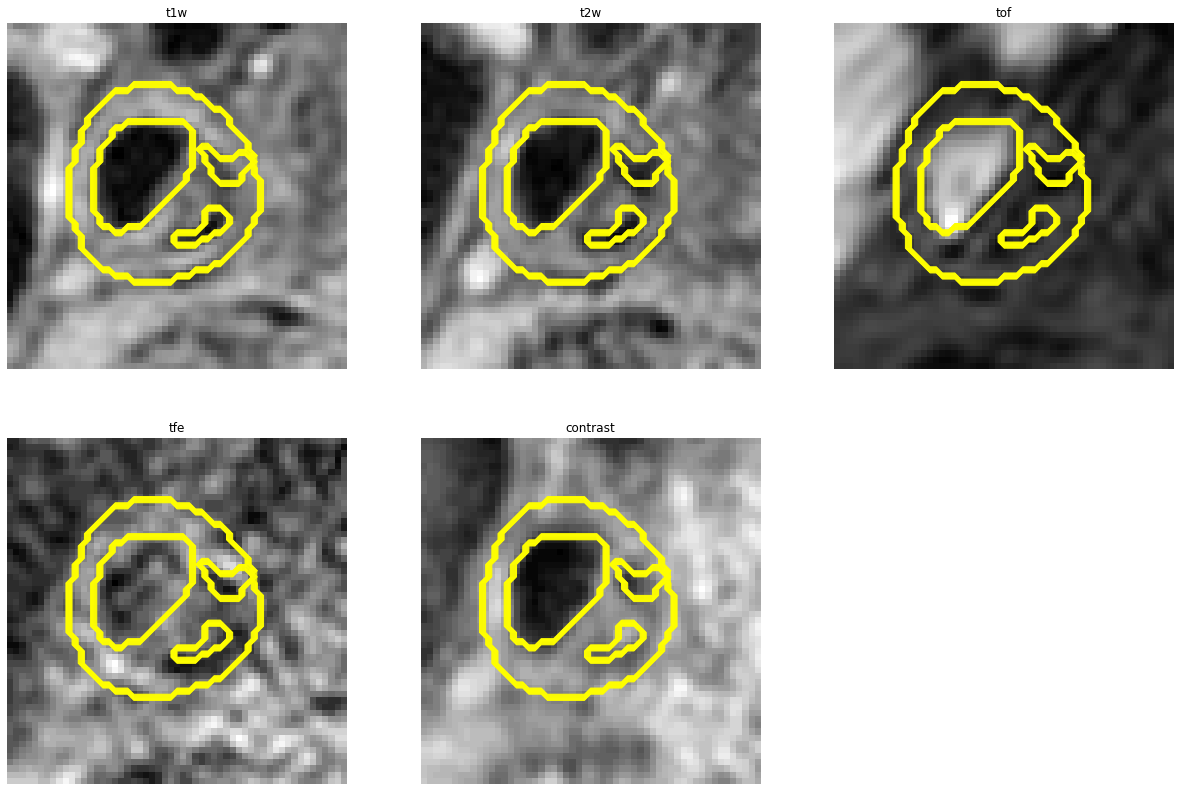

(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)
(528, 528) (528, 528) (528, 528) (528, 528) (528, 528) (528, 528)


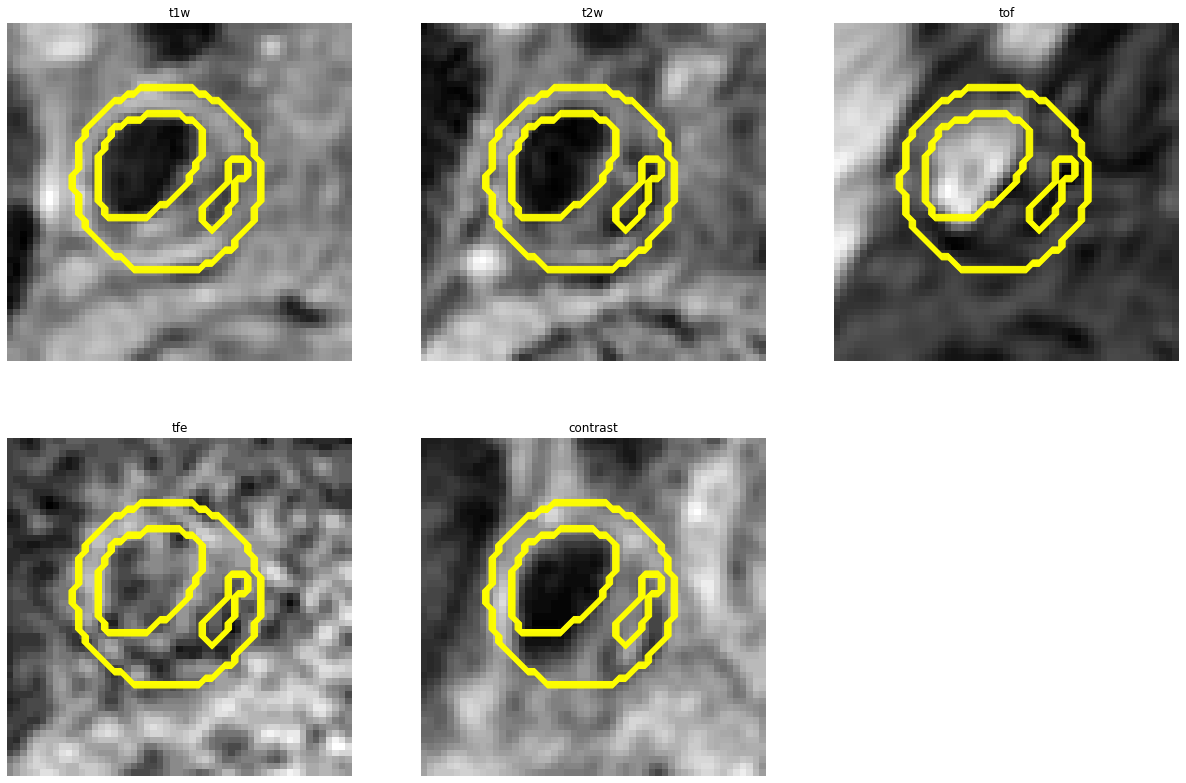

In [377]:
for i in range (1, 16):
    
    sl = "{0:04d}".format(i)
    
    t1w_name = glob.glob(r"Z:\Lisa\PARISK\PARISK-XNAT\plaque_converted_unempty slices\UMCU030_MR_Carotid_Baseline\T1w_SER_*_sl"+sl+".dcm")[0]
    t1wc_name = glob.glob(r"Z:\Lisa\PARISK\PARISK-XNAT\plaque_converted_unempty slices\UMCU030_MR_Carotid_Baseline\T1w-contrast_SER_*_sl"+sl + ".dcm")[0]
    t2w_name = glob.glob(r"Z:\Lisa\PARISK\PARISK-XNAT\plaque_converted_unempty slices\UMCU030_MR_Carotid_Baseline\T2w_SER_*_sl"+sl+".dcm")[0]
    tfe_name = glob.glob(r"Z:\Lisa\PARISK\PARISK-XNAT\plaque_converted_unempty slices\UMCU030_MR_Carotid_Baseline\TFE_SER_*_sl"+sl+".dcm")[0]
    tof_name = glob.glob(r"Z:\Lisa\PARISK\PARISK-XNAT\plaque_converted_unempty slices\UMCU030_MR_Carotid_Baseline\TOF_SER_*_sl"+sl+".dcm")[0]
    con_name = glob.glob(r"Z:\Lisa\PARISK\PARISK-XNAT\plaque_converted_unempty slices\UMCU030_MR_Carotid_Baseline\MASSExport\SER_*_sl"+sl+"_ph0001.dcm")[0]
    
    t1w = get_image(t1w_name)
    t1wc = get_image(t1wc_name)
    t2w = get_image(t2w_name)
    tfe = get_image(tfe_name)
    tof = get_image(tof_name)
    con = get_image(con_name)

    print (t1w.shape, t1wc.shape, t2w.shape, tof.shape, tfe.shape, con.shape)
    
    t1w_shaped = create_shaped(t1w)
    t1wc_shaped = create_shaped(t1wc)
    t2w_shaped = create_shaped(t2w)
    tfe_shaped = create_shaped(tfe)
    tof_shaped = create_shaped(tof)
    con_shaped = create_shaped(con)
    
    write_image(t1w_name, t1w_shaped)
    write_image(t1wc_name, t1wc_shaped)
    write_image(t2w_name, t2w_shaped)
    write_image(tfe_name, tfe_shaped)
    write_image(tof_name, tof_shaped)
    write_image(con_name, con_shaped)
    
    t1w = get_image(t1w_name)
    t1wc = get_image(t1wc_name)
    t2w = get_image(t2w_name)
    tfe = get_image(tfe_name)
    tof = get_image(tof_name)
    con = get_image(con_name)

    print (t1w.shape, t1wc.shape, t2w.shape, tof.shape, tfe.shape, con.shape)
    
    if np.sum(con) > 0:
        xmin = np.min(np.where(con > 0)[0])-10
        xmax = np.max(np.where(con > 0)[0])+15
        ymin = np.min(np.where(con > 0)[1])-10
        ymax = np.max(np.where(con > 0)[1])+15


    fig = plt.figure(figsize=(21, 14))

    plt.subplot(2, 3, 1)
    plt.imshow(t1w[xmin:xmax, ymin:ymax], cmap = 'gist_gray')
    if np.sum(con) > 0:
        for i in np.unique(con):
            plt.contour((con == i)[xmin:xmax, ymin:ymax], colors = ['yellow'], linewidths = 1)
    plt.title('t1w')
    plt.axis('off')

    plt.subplot(2, 3, 2)
    plt.imshow(t2w[xmin:xmax, ymin:ymax], cmap = 'gist_gray')
    if np.sum(con) > 0:
        for i in np.unique(con):
            plt.contour((con == i)[xmin:xmax, ymin:ymax], colors = ['yellow'], linewidths = 1)
    plt.title('t2w')
    plt.axis('off')

    plt.subplot(2, 3, 3)
    plt.imshow(tof[xmin:xmax, ymin:ymax], cmap = 'gist_gray')
    if np.sum(con) > 0:
        for i in np.unique(con):
            plt.contour((con == i)[xmin:xmax, ymin:ymax], colors = ['yellow'], linewidths = 1)
    plt.title('tof')
    plt.axis('off')

    plt.subplot(2, 3, 4)
    plt.imshow(tfe[xmin:xmax, ymin:ymax], cmap = 'gist_gray')
    if np.sum(con) > 0:
        for i in np.unique(con):
            plt.contour((con == i)[xmin:xmax, ymin:ymax], colors = ['yellow'], linewidths = 1)
    plt.title('tfe')
    plt.axis('off')

    plt.subplot(2, 3, 5)
    plt.imshow(t1wc[xmin:xmax, ymin:ymax], cmap = 'gist_gray')
    if np.sum(con) > 0:
        for i in np.unique(con):
            plt.contour((con == i)[xmin:xmax, ymin:ymax], colors = ['yellow'], linewidths = 1)
    plt.title('contrast')
    plt.axis('off')

    plt.show()

In [20]:
t1w_list = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_unempty slices/*Carotid_Baseline/T1w_*.dcm')

In [21]:
tof_list = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_unempty slices/*Carotid_Baseline/TOF_*.dcm')

In [22]:
len(t1w_list), len(tof_list)

(2565, 2520)

In [43]:
import cv2

for filename in t1w_list:
    sub = filename.split(os.path.sep)[1].split('_')[0]
    sl = filename[-8:-4]
    
    dcm = pydicom.read_file(filename, force = True)
    dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    img = dcm.pixel_array
    
    i_min = np.min(img)
    i_max = np.max(img)
    
    img_norm = np.zeros(img.shape, dtype = np.uint16)
    img_norm = (65535*(img - i_min)/(i_max-i_min)).astype(np.uint16)
    
    cv2.imwrite('Z:/Lisa/PARISK/PARISK-XNAT/img/' + sub + '_' + sl + '.png', img_norm)

C:\Users\E.Lavrova\.conda\envs\lisa\lib\site-packages\ipykernel_launcher.py:15: RuntimeWarning: invalid value encountered in true_divide
  from ipykernel import kernelapp as app


In [35]:
def img_thresh(input_img, level):
    mask = (input_img > level).astype(np.uint16)
    output_img = np.zeros(input_img.shape, dtype = np.uint16)
    output_img = input_img*mask
    return output_img

In [145]:
import cv2

for filename in tof_list[:1]:
    sub = filename.split(os.path.sep)[1].split('_')[0]
    sl = filename[-8:-4]
    
    dcm = pydicom.read_file(filename, force = True)
    dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    img = dcm.pixel_array
    
    tof_filename = glob.glob('Z:/Lisa/PARISK/PARISK-XNAT/plaque_converted_unempty slices/*' + sub + '*Carotid_Baseline/T1W_*sl'+sl+'.dcm')[0]
    tof_dcm = pydicom.read_file(tof_filename, force = True)
    tof_dcm.file_meta.TransferSyntaxUID = pydicom.uid.ImplicitVRLittleEndian
    tof_img = tof_dcm.pixel_array
    
    i_min = np.min(img)
    i_max = np.max(img)
    
    i_min_tof = np.min(tof_img)
    i_max_tof = np.max(tof_img)
    
    if (i_max-i_min>0)&(i_max_tof-i_min_tof>0):
        
        img_norm = np.zeros(img.shape, dtype = np.uint16)
        img_norm = (65535*(img - i_min)/(i_max-i_min)).astype(np.uint16)
        img_norm = ((img - i_min)/(i_max-i_min))
        thresholds = threshold_multiotsu(img_norm)
        regions = np.digitize(img_norm, bins=thresholds)

        tof_img_norm = np.zeros(tof_img.shape, dtype = np.uint16)
        tof_img_norm = (65535*(tof_img - i_min_tof)/(i_max_tof-i_min_tof)).astype(np.uint16)

        empty_channel = np.zeros(tof_img.shape, dtype = np.uint16)

        img_channels = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint16)
        img_channels[..., 0] = 65535*(regions==2)
        img_channels[..., 1] = empty_channel
        img_channels[..., 2] = empty_channel
    
        img_tof_channels = np.zeros((img.shape[0], img.shape[1], 3), dtype = np.uint16)
        img_tof_channels[..., 0] = tof_img_norm
        img_tof_channels[..., 1] = tof_img_norm
        img_tof_channels[..., 2] = tof_img_norm
        
        img_highlighted = cv2.addWeighted(img_tof_channels, 1, img_channels, 0.2, 0.0)
        
        ret, thresh = cv2.threshold(regions.astype(np.uint8), 1.5, 2, cv2.THRESH_BINARY)
        contours, hierarchy = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
        cv2.drawContours(img_highlighted, contours, -1, (65535,0,0), 1)

        #cv2.imwrite('Z:/Lisa/PARISK/PARISK-XNAT/img_channels/' + sub + '_' + sl + '.png', img_highlighted)

IndexError: list index out of range

In [19]:
import pydicom
import matplotlib.pyplot as plt

In [16]:
d = pydicom.dcmread(r'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567\00245_1.3.46.670589.33.1.63604178330202415200001.5638964096128920504.dcm')

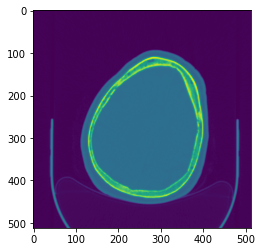

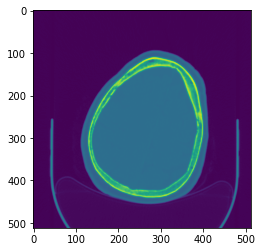

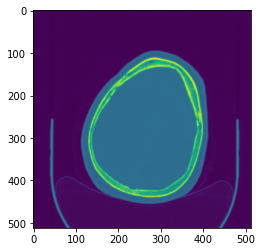

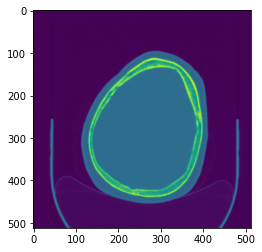

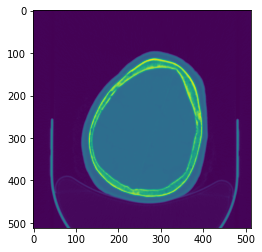

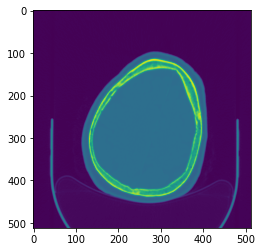

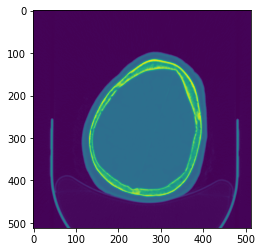

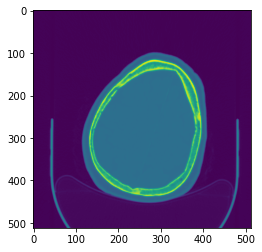

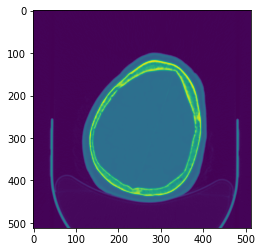

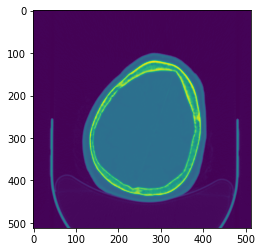

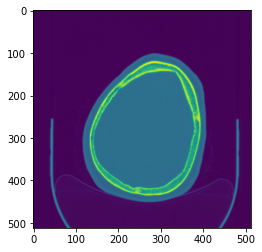

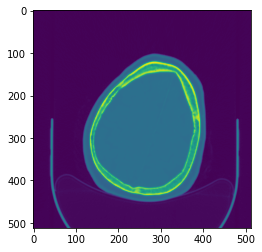

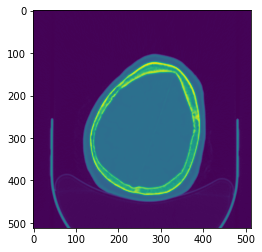

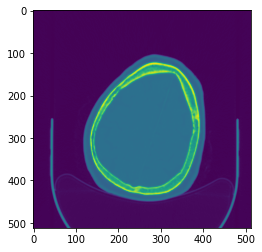

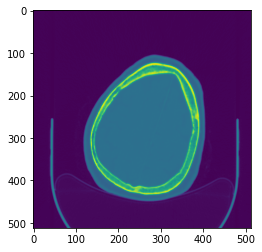

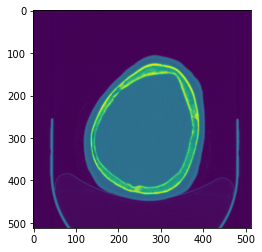

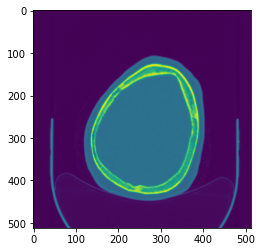

In [22]:
for filename in [    
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00244_1.3.46.670589.33.1.63604178330182414000001.5341087345138296132.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00245_1.3.46.670589.33.1.63604178330202415200001.5638964096128920504.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00246_1.3.46.670589.33.1.63604178330236417100001.4802291026050620310.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00247_1.3.46.670589.33.1.63604178330250417900001.4701943364424078634.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00248_1.3.46.670589.33.1.63604178332365538900001.4796437012738490555.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00249_1.3.46.670589.33.1.63604178332385540100001.5599338738358112557.dcm',
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00250_1.3.46.670589.33.1.63604178332405541200001.5511054606870965039.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00251_1.3.46.670589.33.1.63604178332425542300001.5494584297948738450.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00252_1.3.46.670589.33.1.63604178332439543200001.5228184950359971151.dcm', 
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00253_1.3.46.670589.33.1.63604178332459544300001.5512629587716541905.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00254_1.3.46.670589.33.1.63604178332480545500001.4639755993866902813.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00255_1.3.46.670589.33.1.63604178332500546600001.4906970346326142018.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00256_1.3.46.670589.33.1.63604178332521547800001.5547106380113260325.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00257_1.3.46.670589.33.1.63604178332534548600001.4871469445245766736.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00258_1.3.46.670589.33.1.63604178332554549700001.4745951991806949148.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00259_1.3.46.670589.33.1.63604178332574550900001.5557789379892857479.dcm',  
'Z:/Lisa/MR CLEAN/NCCT_BL/MRCLEAN-MRI-BRAIN/R1567/00260_1.3.46.670589.33.1.63604178332594552000001.4692334170115171071.dcm'  
]:
    dcm = pydicom.dcmread(filename)
    img = dcm.pixel_array
    plt.imshow(img)
    plt.show()